##Image Classification of Cifar-10 dataset using CNNs

Note: Keras starting training the weights from previous fit() function if the function is called again in same script. So, in the data augmentation section, the model weights from previous training gets trained again.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, BatchNormalization, Dropout, MaxPooling2D, GlobalMaxPooling2D, Flatten
import matplotlib.pyplot as plt

In [ ]:
cifar= tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test)= cifar.load_data()
x_train, x_test= x_train/255.0, x_test/255.0
y_train, y_test= y_train.flatten(), y_test.flatten()
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000,)


In [ ]:
k= len(set(y_train))
print(k)

10


In [ ]:
i= Input(shape=x_train[0].shape)

x= Conv2D(32, (3,3), activation='relu', padding='same')(i)
x= BatchNormalization()(x)
x= Conv2D(32, (3,3), activation='relu', padding='same')(x)
x= BatchNormalization()(x)
x= Conv2D(32, (3,3), activation='relu', padding='same')(x)
x= MaxPooling2D(2,2)(x)

x= Conv2D(64, (3,3), activation='relu', padding='same')(x)
x= BatchNormalization()(x)
x= Conv2D(64, (3,3), activation='relu', padding='same')(x)
x= BatchNormalization()(x)
x= Conv2D(64, (3,3), activation='relu', padding='same')(x)
x= MaxPooling2D(2,2)(x)

x= Conv2D(128, (3,3), activation='relu', padding='same')(x)
x= BatchNormalization()(x)
x= Conv2D(128, (3,3), activation='relu', padding='same')(x)
x= BatchNormalization()(x)
x= Conv2D(128, (3,3), activation='relu', padding='same')(x)
x= BatchNormalization()(x)
x= MaxPooling2D(2,2)(x)

x= Flatten()(x)
x= Dense(512, activation='relu')(x)
x= Dropout(0.1)(x)
x= Dense(k, activation='softmax')(x)

model= Model(i,x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0     

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
r=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3085 - acc: 0.5416 - val_loss: 1.0562 - val_acc: 0.6299
Epoch 2/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8528 - acc: 0.7042 - val_loss: 0.8278 - val_acc: 0.7122
Epoch 3/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6885 - acc: 0.7616 - val_loss: 0.7046 - val_acc: 0.7667
Epoch 4/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5815 - acc: 0.7981 - val_loss: 0.8685 - val_acc: 0.7248
Epoch 5/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.4885 - acc: 0.8310 - val_loss: 0.7781 - val_acc: 0.7566
Epoch 6/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.4069 - acc: 0.8605 - val_loss: 0.5870 - val_acc: 0.8148
Epoch 7/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.3340 - acc: 0.8845 - val_loss: 0.6025 - val_acc: 0.8122
Epoch 8/50
1563/1563 [==========================

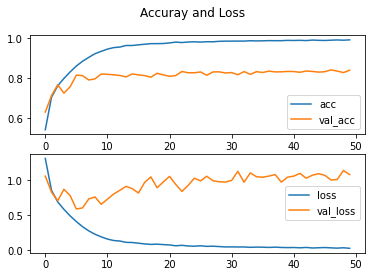

In [ ]:
fig, axs = plt.subplots(2)
fig.suptitle('Accuray and Loss')
axs[0].plot(r.history['acc'],label='acc')
axs[0].plot(r.history['val_acc'], label='val_acc')
axs[0].legend()
axs[1].plot(r.history['loss'],label='loss')
axs[1].plot(r.history['val_loss'],label='val_loss')
axs[1].legend()

Confusion matrix, without normalization
[[906   8  26   9   6   4   2   6  30   3]
 [ 13 933   3   4   2   3   3   2  13  24]
 [ 60   1 767  26  54  36  31  14   5   6]
 [ 36   1  44 636  42 154  41  31  10   5]
 [ 15   1  41  31 822  36  17  35   1   1]
 [ 11   2  26  72  27 813   9  34   5   1]
 [  7   1  30  33  22  24 862  11   8   2]
 [ 13   2  12  11  39  38   0 877   6   2]
 [ 47  13   1   5   4   1   4   2 917   6]
 [ 41  49   4   6   2   6   5   5  23 859]]


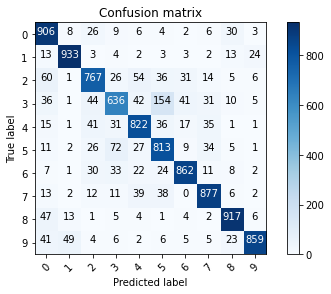

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [ ]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

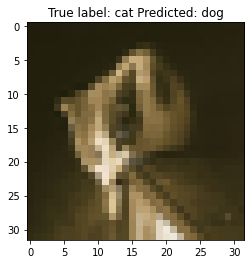

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

##Using Image Augmentation

In [ ]:
batch_size= 32
data_generator= tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator= data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch= len(x_train) // batch_size
r= model.fit(train_generator, validation_data=(x_test,y_test),steps_per_epoch= steps_per_epoch,epochs=50)

Epoch 1/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.5290 - acc: 0.8333 - val_loss: 0.5407 - val_acc: 0.8282
Epoch 2/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.4062 - acc: 0.8658 - val_loss: 0.4720 - val_acc: 0.8532
Epoch 3/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3650 - acc: 0.8775 - val_loss: 0.4448 - val_acc: 0.8559
Epoch 4/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.3386 - acc: 0.8877 - val_loss: 0.4415 - val_acc: 0.8570
Epoch 5/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.3260 - acc: 0.8901 - val_loss: 0.4473 - val_acc: 0.8520
Epoch 6/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.3096 - acc: 0.8951 - val_loss: 0.4676 - val_acc: 0.8545
Epoch 7/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.2908 - acc: 0.9019 - val_loss: 0.4241 - val_acc: 0.8664
Epoch 8/50
1562/1562 [==========================

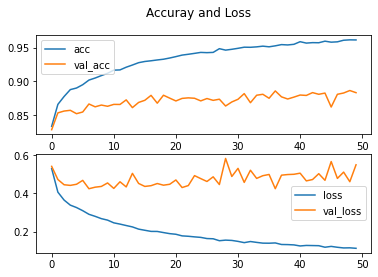

In [ ]:
fig, axs = plt.subplots(2)
fig.suptitle('Accuray and Loss')
axs[0].plot(r.history['acc'],label='acc')
axs[0].plot(r.history['val_acc'], label='val_acc')
axs[0].legend()
axs[1].plot(r.history['loss'],label='loss')
axs[1].plot(r.history['val_loss'],label='val_loss')
axs[1].legend()

Confusion matrix, without normalization
[[903   7  31  10   9   1   7   7  19   6]
 [  5 964   0   1   1   0   1   0   5  23]
 [ 28   1 828  31  28  23  35  17   3   6]
 [ 10   4  34 770  25  75  51  21   2   8]
 [  6   1  20  27 880  18  28  19   0   1]
 [  1   1  18 100  24 810  28  17   0   1]
 [  3   1  15  24   7   3 943   3   1   0]
 [  3   1  12  19  17  15   4 927   0   2]
 [ 51   7  11   1   2   3   5   5 899  16]
 [  7  48   3   8   1   2   7   7   9 908]]


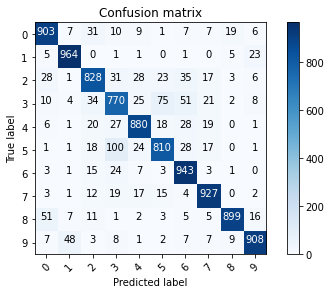

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [ ]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

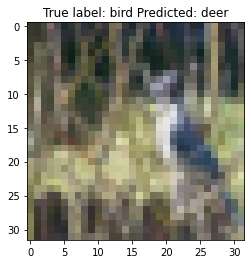

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));